# Making a contour map of global temperature

### Reading NetCDF files
NetCDF (Network Common Data Form) is a set of software libraries. It supports the creation, access, and sharing of array-oriented scientific data. 
For more information on NetCDF can be found here: <br>
  >  https://unidata.github.io/netcdf4-python/netCDF4/index.html

First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [2]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file.

In [38]:
# Open a netCDF file
filename='T_CRU_1961_1990mean.nc'
f1=Dataset(filename,'a')

Let's check what is f1.

In [ ]:
print(f1)

Print variables in the file.

In [48]:
print (f1.variables.keys())

odict_keys(['tem', 'lat', 'lon', 'time'])


Let's check some of the variables. 

In [49]:
print(f1.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
unlimited dimensions: 
current shape = (36,)
filling on, default _FillValue of 9.969209968386869e+36 used



To see the values for the latitude variable:

We can assign the values as a 'lat' variable.

In [50]:
lat=f1.variables['lat'][:]

Check the variable longitude and assign it as a "lon" variable.

In [51]:
lon=f1.variables['lon'][:]

"tem" is a variable for temperature. 

In [52]:
print(f1.variables['tem'])

<class 'netCDF4._netCDF4.Variable'>
int16 tem(time, lat, lon)
    long_name: CRU_Global_1961-1990_Mean_Monthly_Surface_Temperature_Climatology
    units: celsius
    scale_factor: 0.01
    valid_min: -9000
    missing_value: -9999
unlimited dimensions: 
current shape = (12, 36, 72)
filling on, default _FillValue of -32767 used



You can see that the unit is Celcius.

In [53]:
tem=f1.variables['tem'][:]

Let's check the dimension of tem.

In [54]:
print(tem.shape)

(12, 36, 72)


The dimensions are time, latitude and longitude.

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for January temperature.

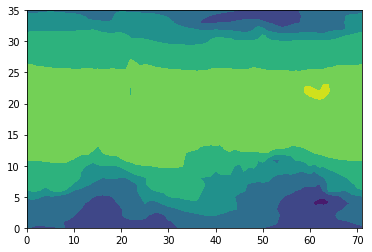

In [55]:
plt.contourf(tem[0,:,:])

Let's make a little prettier figure.

In [ ]:
# Choose color
cmap1=plt.cm.RdYlBu_r

# map projection
proj = ccrs.PlateCarree()

# set contour levels
levels = np.arange(-60,40,5)

# Make a plot
ax = plt.axes(projection=proj)
cs=ax.contourf(lon, lat, tem[0,:,:],levels,
                transform=proj,
                cmap=cmap1)
ax.coastlines()
ax.set_extent([-180, 180, -90, 90]) # longitude latitude extent
plt.title('January average temperature (oC)') #title
plt.colorbar(cs, orientation='horizontal') # color map

#### Exercise
Make a contour plot for July temperature.

Annual average.

In [58]:
tem_ann=np.mean(tem,axis=0)
print(tem_ann.shape)

(36, 72)


#### Exercise
Make a contour plot for Annual temperature.

#### Exercise
Read the precipitation file "trmm_mon_1998_2015.nc". The unit of precipitation is mm/hour. Make it as mm/day by multipying 24. 

#### Exercise
Make plots for January and Julpy precipitation.

#### Exercise
Make a contour plot for Annual precipitation.